<a href="https://colab.research.google.com/github/jhermosillo/DIPLOMADO_CDP/blob/main/Modulo%204%20-%20Machine%20Leaning/code/ML_05_EnsembleModels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [73]:
import numpy as np
import matplotlib.pyplot as plt
import graphviz

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.datasets import mnist

# Load data

In [88]:
# Load data
iris = load_iris()
X = iris.data[:, :2]
Y = iris.target

# Split train - test
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 2)
(30, 2)
(120,)
(30,)


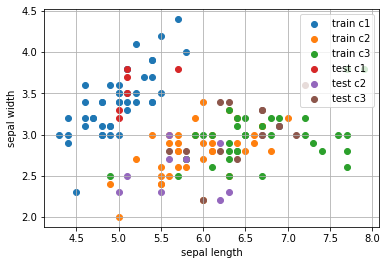

In [77]:
# Plot two features: petal length and petal width
plt.figure(figsize=(6, 4))
plt.scatter(x_train[y_train==0, 0], x_train[y_train==0, 1], label="train c1")
plt.scatter(x_train[y_train==1, 0], x_train[y_train==1, 1], label="train c2")
plt.scatter(x_train[y_train==2, 0], x_train[y_train==2, 1], label="train c3")
plt.scatter(x_test[y_test==0, 0], x_test[y_test==0, 1], label="test c1")
plt.scatter(x_test[y_test==1, 0], x_test[y_test==1, 1], label="test c2")
plt.scatter(x_test[y_test==2, 0], x_test[y_test==2, 1], label="test c3")
plt.legend()
plt.grid(True)
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

In [85]:
"""
# Try with the mnist dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
"""

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9]


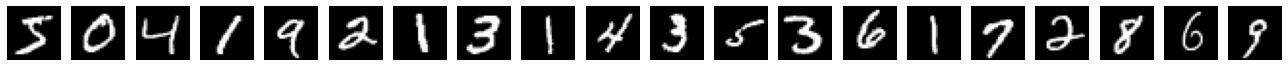

In [87]:
"""
# Show examples
print(y_train[:20])

plt.figure(figsize=(18, 3))
for ind in range(20):
  plt.subplot(1, 20, ind+1)
  plt.imshow(x_train[ind], cmap='gray')
  plt.axis('off')
plt.tight_layout()
plt.show()
"""

In [ ]:
"""
# Reshape data
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

print(x_train.shape)
print(x_test.shape)
"""

# Decision trees

In [89]:
# Create a decision tree classifier and train it
cl1 = DecisionTreeClassifier(max_depth=3).fit(x_train, y_train)

print(f"Training mean accuracy: {cl1.score(x_train, y_train):6.4f}")
print(f"Test mean accuracy: {cl1.score(x_test, y_test):6.4f}")

Training mean accuracy: 0.8167
Test mean accuracy: 0.8000


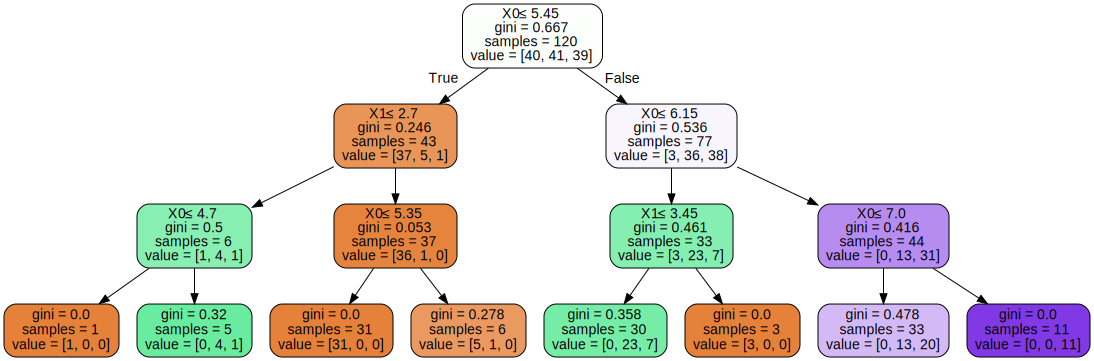

In [90]:
# Plot the trained tree
dot_data = export_graphviz(cl1, out_file=None, feature_names=None,
                          class_names=None, filled=True, rounded=True,
                          special_characters=True)
graph = graphviz.Source(dot_data)
graph

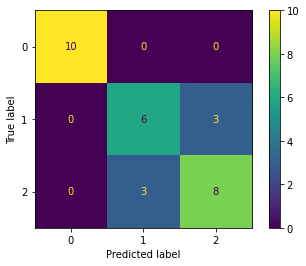

In [91]:
# Cofusion matrix
y_test_hat = cl1.predict(x_test)
CM = confusion_matrix(y_test, y_test_hat, labels=cl1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=CM, display_labels=cl1.classes_)
disp.plot()

# Random forest

In [92]:
# Create a random forest
cl2 = RandomForestClassifier(max_depth=3).fit(x_train, y_train)

print(f"Training mean accuracy: {cl2.score(x_train, y_train):6.4f}")
print(f"Test mean accuracy: {cl2.score(x_test, y_test):6.4f}")

Training mean accuracy: 0.8083
Test mean accuracy: 0.8000


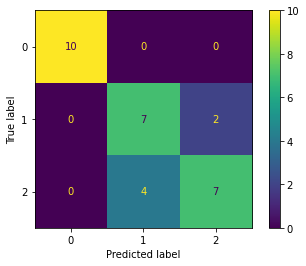

In [93]:
# Confusion matrix
y_test_hat = cl2.predict(x_test)
CM = confusion_matrix(y_test, y_test_hat, labels=cl2.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=CM, display_labels=cl2.classes_)
disp.plot()

# Bagging

In [94]:
# Define a dictionary for grid search
params = {'base_estimator': [DecisionTreeClassifier(), KNeighborsClassifier()],
          'n_estimators': [20, 50],
          'max_samples': [0.5, 1.0],
          'max_features': [0.1, 0.5]}

In [95]:
# Create a bagging meta-model, and train it
bagging_classifier_grid = GridSearchCV(BaggingClassifier(n_jobs=-1), param_grid =params, verbose=1)
bagging_classifier_grid.fit(x_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    9.3s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=BaggingClassifier(base_estimator=None, bootstrap=True,
                                         bootstrap_features=False,
                                         max_features=1.0, max_samples=1.0,
                                         n_estimators=10, n_jobs=-1,
                                         oob_score=False, random_state=None,
                                         verbose=0, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'base_estimator': [DecisionTreeClassifier(ccp_alpha=0.0,
                                                                   class_we...
                                                                   presort='deprecated',
                                                                   random_state=None,
                                                                   splitter='best'),
                                            KNeighborsClas

In [96]:
# Print info about best score and best hyperparameters
print(f"Best score: {bagging_classifier_grid.best_score_:.4f}")
print(f"Best params: {bagging_classifier_grid.best_params_}")

Best score: 0.7500
Best params: {'base_estimator': KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), 'max_features': 0.5, 'max_samples': 0.5, 'n_estimators': 50}


In [97]:
# Extract best estimator
best_clf = bagging_classifier_grid.best_estimator_

print(f"Training mean accuracy: {best_clf.score(x_train, y_train):6.4f}")
print(f"Test mean accuracy: {best_clf.score(x_test, y_test):6.4f}")

Training mean accuracy: 0.8167
Test mean accuracy: 0.8000


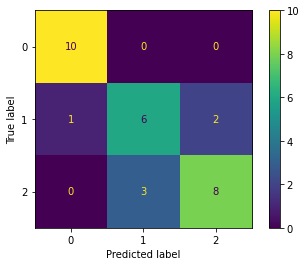

In [98]:
# Confusion matrix
y_test_hat = best_clf.predict(x_test)
CM = confusion_matrix(y_test, y_test_hat, labels=best_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=CM, display_labels=best_clf.classes_)
disp.plot()

In [99]:
#
#1) Encuentra la combinación de hiperparámetros que te de mejor desempeño.
#2) Prueba usando las 4 variables de la base de datos iris.
#3) Ahora intenta con la base de datos mnist.